In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
df = pd.read_csv('Population of all US Cities 2024.csv')

In [222]:
df.head()

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              300 non-null    int64  
 1   US City           300 non-null    object 
 2   US State          300 non-null    object 
 3   Population 2024   300 non-null    int64  
 4   Population 2020   300 non-null    int64  
 5   Annual Change     300 non-null    float64
 6   Density (/mile2)  300 non-null    int64  
 7   Area (mile2)      300 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.9+ KB


In [224]:
df_population_evolution_per_city = df.loc[:, ['US City', 'Population 2024', 'Population 2020']].copy()
df_population_evolution_per_city['Diff. Population (2024 - 2020)'] = df_population_evolution_per_city['Population 2024'] - df_population_evolution_per_city['Population 2020']
df_population_evolution_per_city.head()

,US City,Population 2024,Population 2020,Diff. Population (2024 - 2020)
0,New York,8097282,8740292,-643010
1,Los Angeles,3795936,3895848,-99912
2,Chicago,2638159,2743329,-105170
3,Houston,2319119,2299269,19850
4,Phoenix,1662607,1612459,50148


In [225]:
data_filter = df_population_evolution_per_city['Diff. Population (2024 - 2020)'] < 0

In [226]:
cities_lose_population = df_population_evolution_per_city[data_filter].copy()
cities_lose_population.shape

(136, 4)

In [227]:
cities_lose_population.drop(columns=['Population 2024', 'Population 2020'], inplace=True)
cities_lose_population.loc[:, 'Diff. Population (2024 - 2020)'] = cities_lose_population['Diff. Population (2024 - 2020)'] * -1
cities_lose_population = cities_lose_population.rename(columns={'Diff. Population (2024 - 2020)': 'Population Lost'})
cities_lose_population.set_index('US City', inplace=True)
cities_lose_population.sort_values('Population Lost', ascending=False, inplace=True)
cities_lose_population.head()

,Population Lost
US City,
New York,643010
Chicago,105170
Los Angeles,99912
San Francisco,82040
Philadelphia,66856


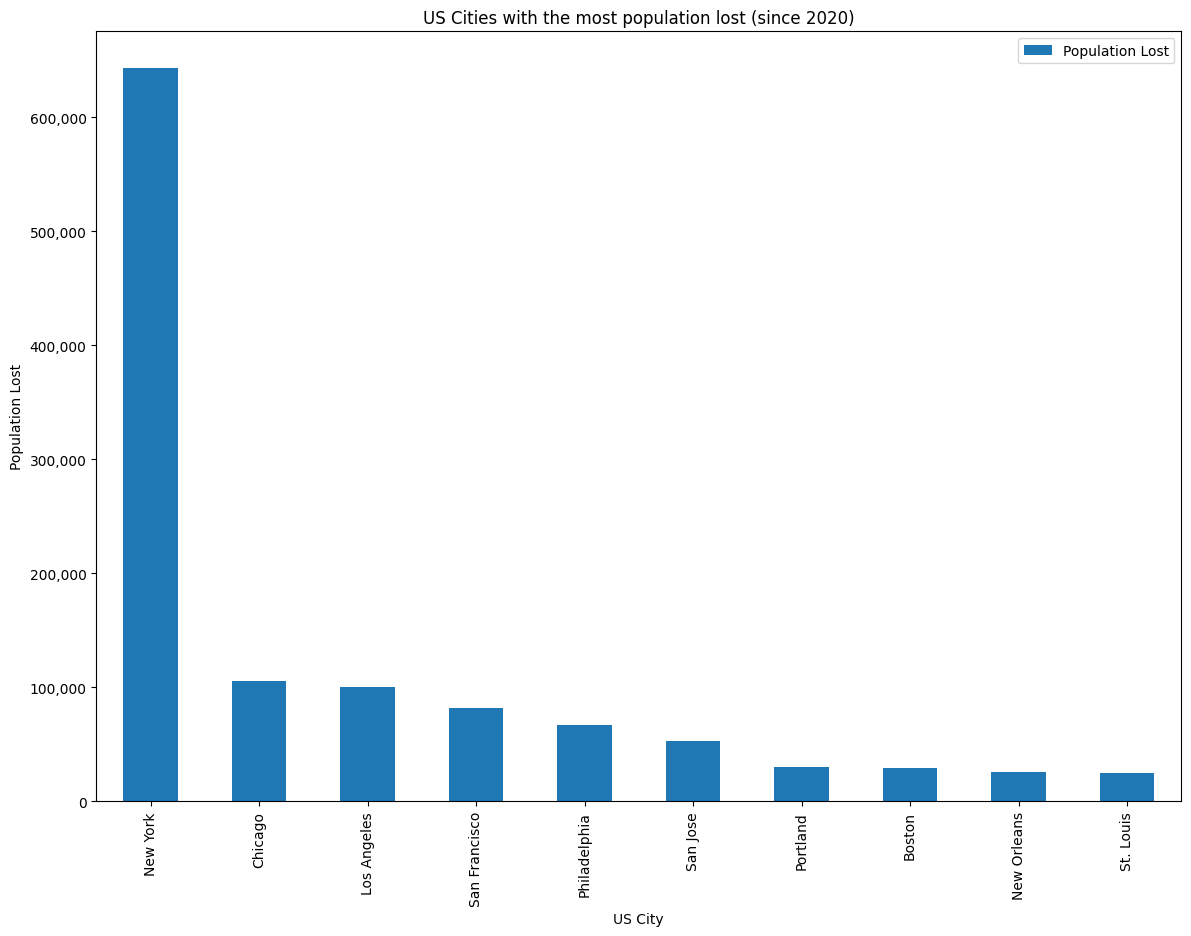

In [228]:
fig, ax = plt.subplots(figsize=(14, 10))
cities_lose_population.head(10).plot(kind='bar', title='US Cities with the most population lost (since 2020)', ax=ax)
ax.set_ylabel('Population Lost')
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show()

In [229]:
data_filter = df_population_evolution_per_city['Diff. Population (2024 - 2020)'] > 0
cities_increased_population = df_population_evolution_per_city[data_filter].copy()

cities_increased_population.drop(columns=['Population 2024', 'Population 2020'], inplace=True)

cities_increased_population = cities_increased_population.rename(columns={'Diff. Population (2024 - 2020)': 'Population Increase'})
cities_increased_population.set_index('US City', inplace=True)
cities_increased_population.sort_values('Population Increase', ascending=False, inplace=True)
cities_increased_population.head()

,Population Increase
US City,
San Antonio,74717
Fort Worth,73154
Port St. Lucie,50941
Phoenix,50148
Charlotte,47412


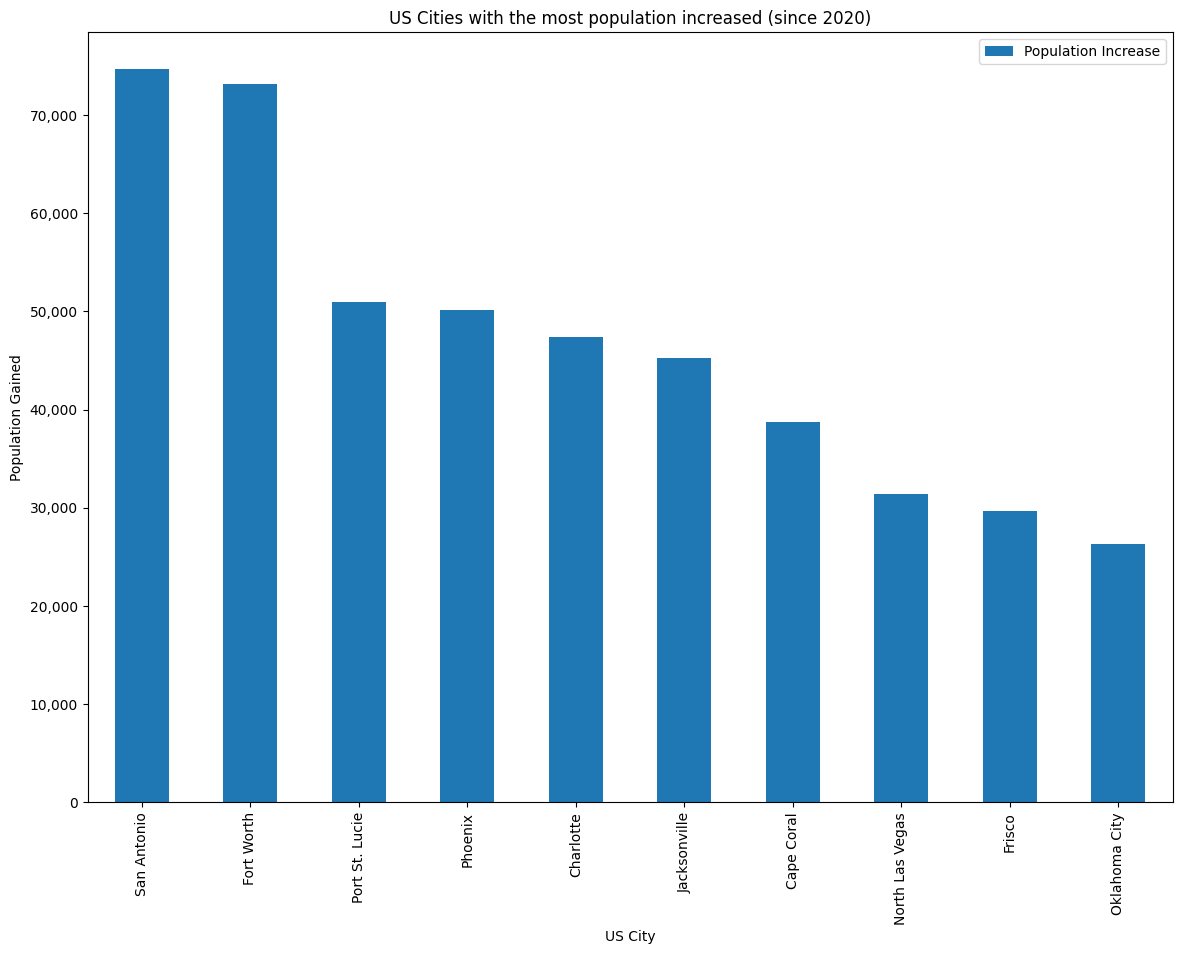

In [230]:
fig, ax = plt.subplots(figsize=(14, 10))
cities_increased_population.head(10).plot(kind='bar', title='US Cities with the most population increased (since 2020)', ax=ax)
ax.set_ylabel('Population Gained')
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show()

In [231]:
df_population_evolution_per_city['Diff. Population (2024 - 2020)'].describe()

count       300.000000
mean       -524.593333
std       40727.738165
min     -643010.000000
25%       -3540.000000
50%         631.000000
75%        6976.500000
max       74717.000000
Name: Diff. Population (2024 - 2020), dtype: float64

In [232]:
df_population_evolution_per_state = df.groupby('US State')[['Population 2024', 'Population 2020']].sum()
df_population_evolution_per_state.head()

,Population 2024,Population 2020
US State,,
Alabama,912682,907661
Alaska,284469,290893
Arizona,4569930,4411668
Arkansas,204244,202634
California,18244451,18563156


In [233]:
df_population_evolution_per_state['Diff. Population (2024-2020)'] = df_population_evolution_per_state['Population 2024'] - df_population_evolution_per_state['Population 2020']
df_population_evolution_per_state.head()

,Population 2024,Population 2020,Diff. Population (2024-2020)
US State,,,
Alabama,912682,907661,5021
Alaska,284469,290893,-6424
Arizona,4569930,4411668,158262
Arkansas,204244,202634,1610
California,18244451,18563156,-318705


In [234]:
data_filter = df_population_evolution_per_state['Diff. Population (2024-2020)'] < 0
states_lost_population = df_population_evolution_per_state[data_filter].copy()
states_lost_population.loc[:, 'Diff. Population (2024-2020)'] = states_lost_population['Diff. Population (2024-2020)'] * - 1
states_lost_population = states_lost_population.rename(columns={'Diff. Population (2024-2020)': 'Population Lost'})
states_lost_population.sort_values('Population Lost', ascending=False, inplace=True)
states_lost_population.head()

,Population 2024,Population 2020,Population Lost
US State,,,
New York,8928795,9586425,657630
California,18244451,18563156,318705
Illinois,3486029,3600799,114770
Pennsylvania,1961838,2029190,67352
Louisiana,1010534,1056319,45785


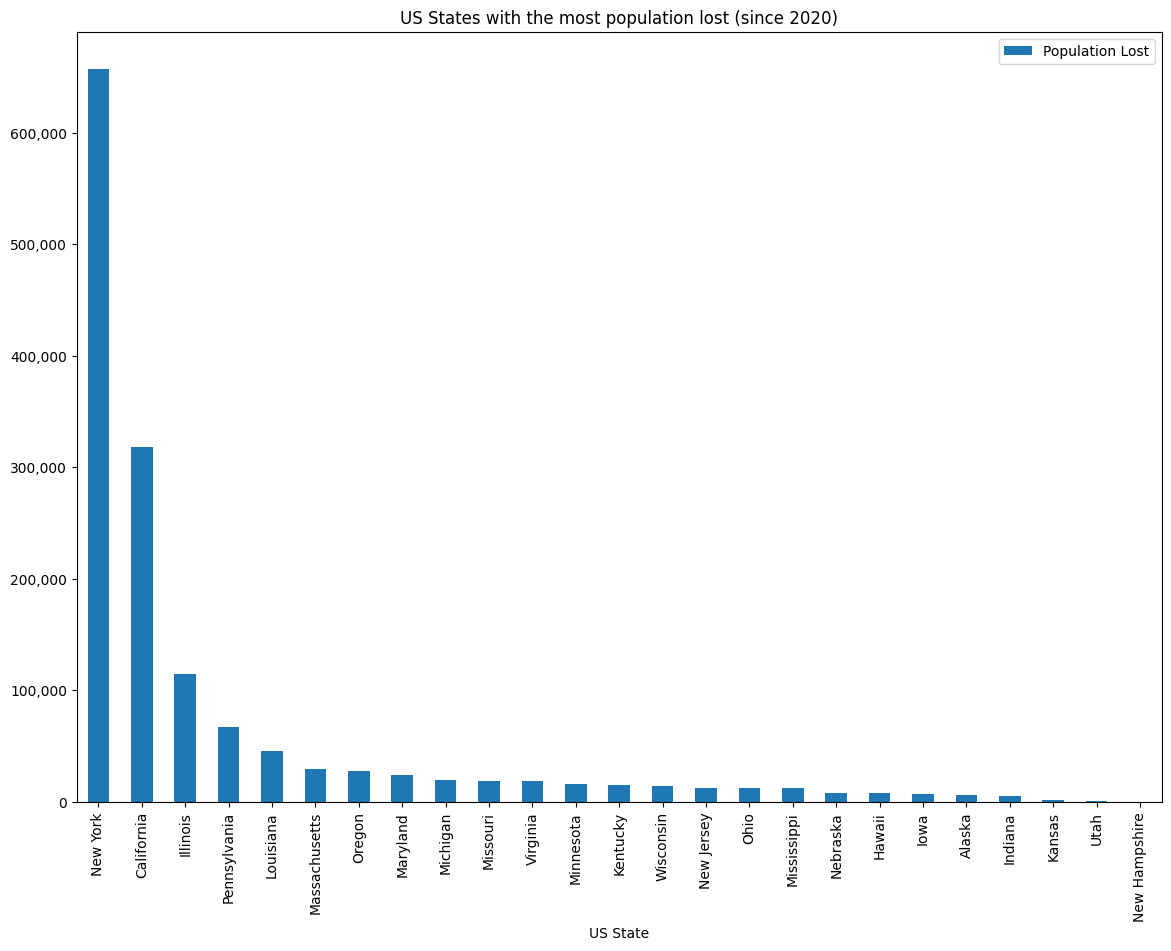

In [235]:
fig, ax = plt.subplots(figsize=(14, 10))
states_lost_population.plot(kind='bar', y="Population Lost", ax=ax)
ax.set_title('US States with the most population lost (since 2020)')
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show()

In [236]:
data_filter = df_population_evolution_per_state['Diff. Population (2024-2020)'] > 0
states_increased_population = df_population_evolution_per_state[data_filter].copy()
states_increased_population = states_increased_population.rename(columns={'Diff. Population (2024-2020)': 'Population Increased'})
states_increased_population.sort_values('Population Increased', ascending=False, inplace=True)
states_increased_population.head()

,Population 2024,Population 2020,Population Increased
US State,,,
Texas,13756588,13347167,409421
Florida,5396156,5136504,259652
Arizona,4569930,4411668,158262
North Carolina,3015702,2891148,124554
Nevada,2536492,2425575,110917


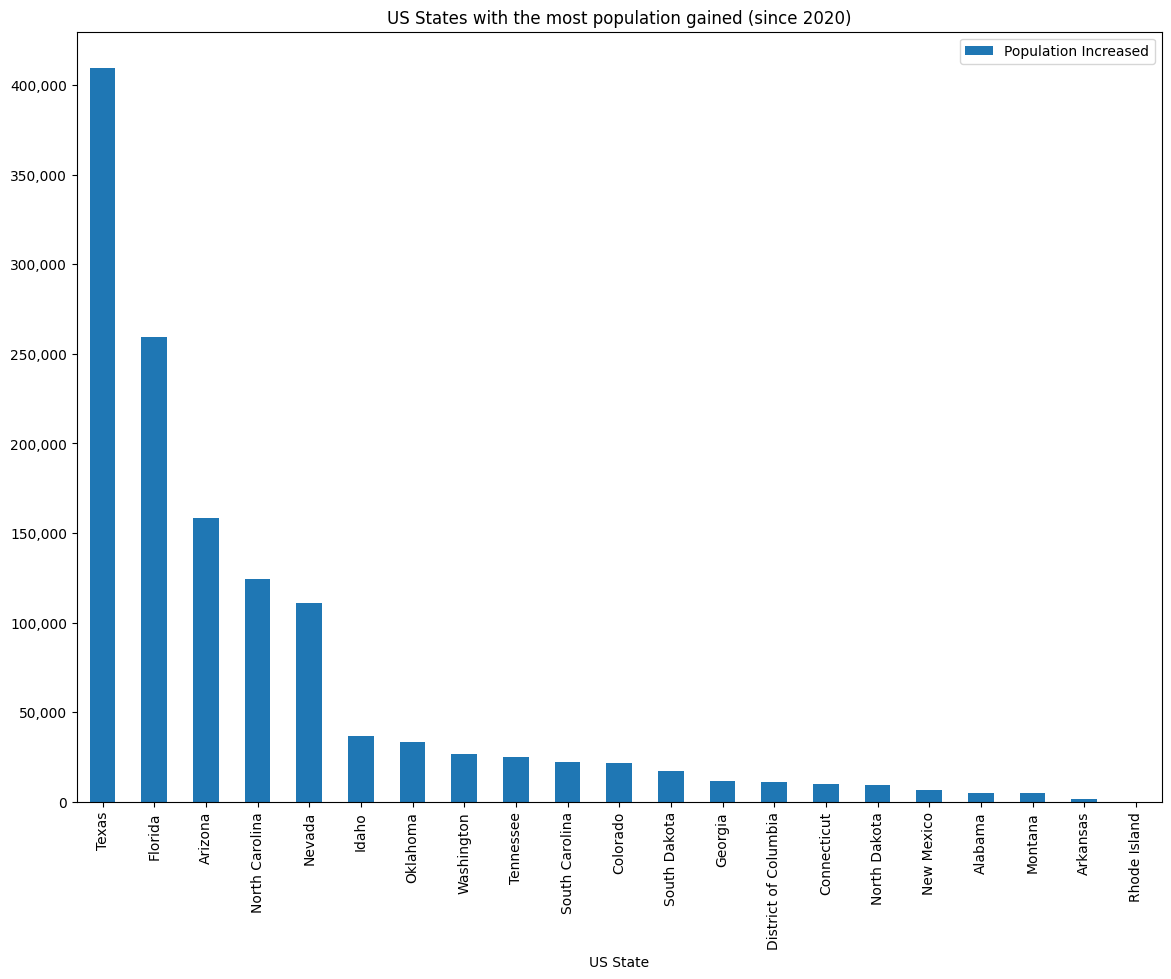

In [237]:
fig, ax = plt.subplots(figsize = (14, 10))
states_increased_population.plot(kind='bar', y='Population Increased', title="US States with the most population gained (since 2020)", ax=ax)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show()

In [238]:
df_density = df.copy()
df_density = df_density.rename(columns={'Density (/mile2)': 'Density 2024'})
df_density['Density 2020'] = np.ceil(df_density['Population 2020'] / df_density['Area (mile2)']).astype(np.int64)
df_density.head()

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density 2024,Area (mile2),Density 2020
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,29090
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52,8280
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75,12046
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61,3590
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33,3111


In [239]:
df_density = df_density.groupby(['US State', 'US City'])[['Density 2020', 'Density 2024']].sum()
df_density['Diff Density (2024-2020)'] = df_density['Density 2024'] - df_density['Density 2020']
df_density.head()

Density 2020  Density 2024  Diff Density (2024-2020)
US State US City                                                         
Alabama  Birmingham          1363          1329                       -34
         Huntsville           968          1022                        54
         Mobile              1338          1299                       -39
         Montgomery          1252          1212                       -40
         Tuscaloosa          1677          1830                       153

In [240]:
data_filter = df_density['Diff Density (2024-2020)'] < 0
df_lose_density = df_density[data_filter]
df_lose_density.head()

Density 2020  Density 2024  Diff Density (2024-2020)
US State   US City                                                         
Alabama    Birmingham          1363          1329                       -34
           Mobile              1338          1299                       -39
           Montgomery          1252          1212                       -40
Alaska     Anchorage            171           167                        -4
California Anaheim             6895          6731                      -164

In [241]:
df_lose_density.loc[:, 'Diff Density (2024-2020)'] = df_lose_density['Diff Density (2024-2020)'] * - 1

In [244]:
cities_lose_density = df_lose_density.reset_index(level=0).drop(columns='US State').copy()
cities_lose_density.sort_values(by='Diff Density (2024-2020)', ascending=False, inplace=True)
cities_lose_density = cities_lose_density.rename(columns={'Diff Density (2024-2020)': 'Density Lost'})
cities_lose_density.head()

,Density 2020,Density 2024,Density Lost
US City,,,
New York,29090,26950,2140
San Francisco,18641,16884,1757
East Los Angeles,16176,15288,888
Berkeley,11909,11236,673
Boston,13974,13377,597


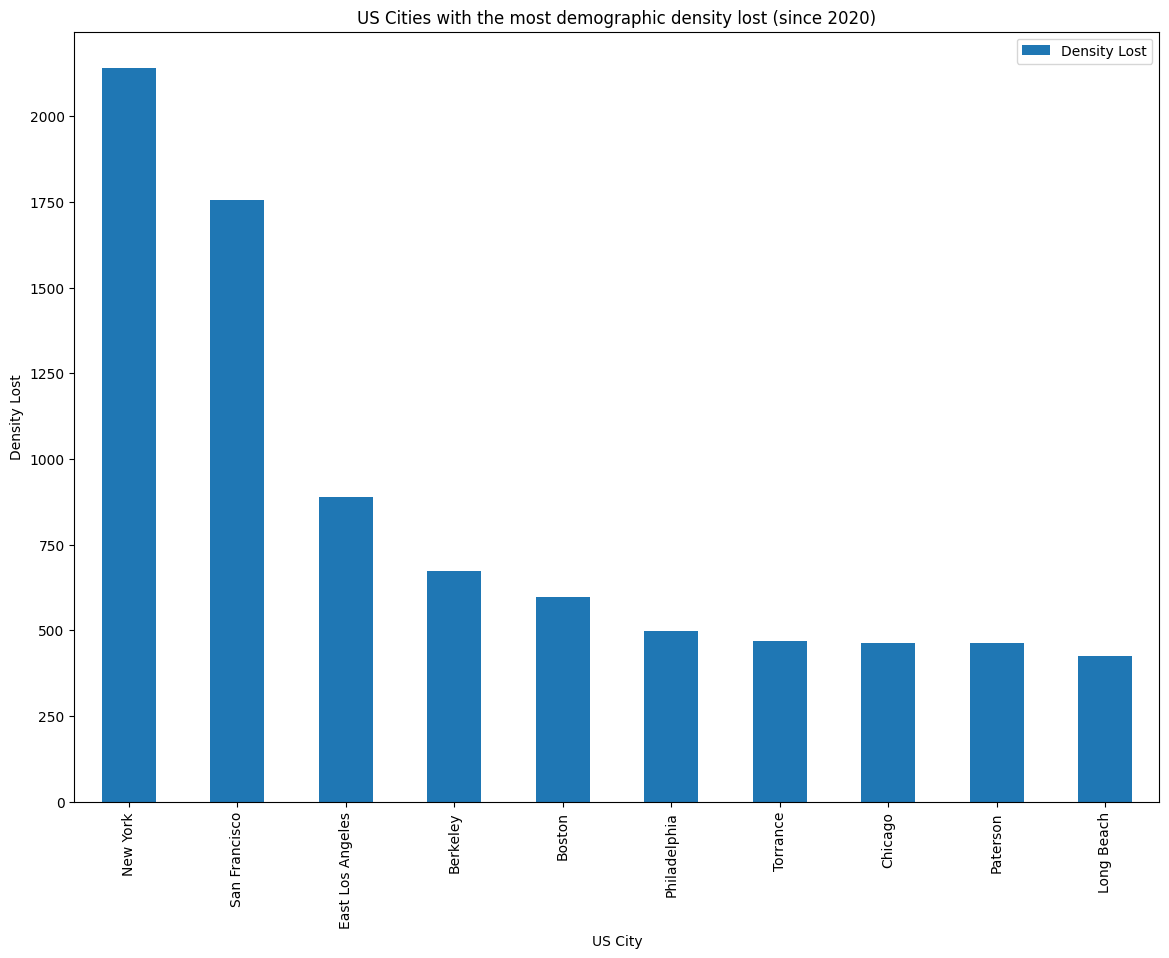

In [248]:
fig, ax = plt.subplots(figsize=(14,10))
cities_lose_density.head(10).plot(kind='bar', y='Density Lost', ylabel="Density Lost", ax=ax)
ax.set_title('US Cities with the most demographic density lost (since 2020)')
plt.show()

In [249]:
states_lose_density = df_lose_density.reset_index(level=1).drop(columns='US City').copy()
states_lose_density.sort_values(by='Diff Density (2024-2020)', ascending=False, inplace=True)
states_lose_density = states_lose_density.rename(columns={'Diff Density (2024-2020)': 'Density Lost'})
states_lose_density.head()

,Density 2020,Density 2024,Density Lost
US State,,,
New York,29090,26950,2140
California,18641,16884,1757
California,16176,15288,888
California,11909,11236,673
Massachusetts,13974,13377,597


In [250]:
states_lose_density.index.unique()

Index(['New York', 'California', 'Massachusetts', 'Pennsylvania', 'Illinois',
       'New Jersey', 'Missouri', 'Virginia', 'Maryland', 'Oregon', 'Wisconsin',
       'Utah', 'Michigan', 'Minnesota', 'Ohio', 'Louisiana', 'Texas', 'Hawaii',
       'Washington', 'Mississippi', 'Colorado', 'Nebraska', 'Nevada',
       'Tennessee', 'Florida', 'Indiana', 'Iowa', 'Kentucky', 'Alabama',
       'Kansas', 'New Mexico', 'Georgia', 'Oklahoma', 'Idaho', 'Connecticut',
       'Alaska', 'New Hampshire'],
      dtype='object', name='US State')

In [256]:
states_lose_density = states_lose_density.groupby(states_lose_density.index)[states_lose_density.columns].sum()

In [261]:
df_lose_density.loc['California']['Diff Density (2024-2020)'].sum()

9023

In [264]:
states_lose_density.loc['California']

Density 2020    232940
Density 2024    223917
Density Lost      9023
Name: California, dtype: int64

In [266]:
states_lose_density.sort_values('Density Lost', ascending=False, inplace=True)

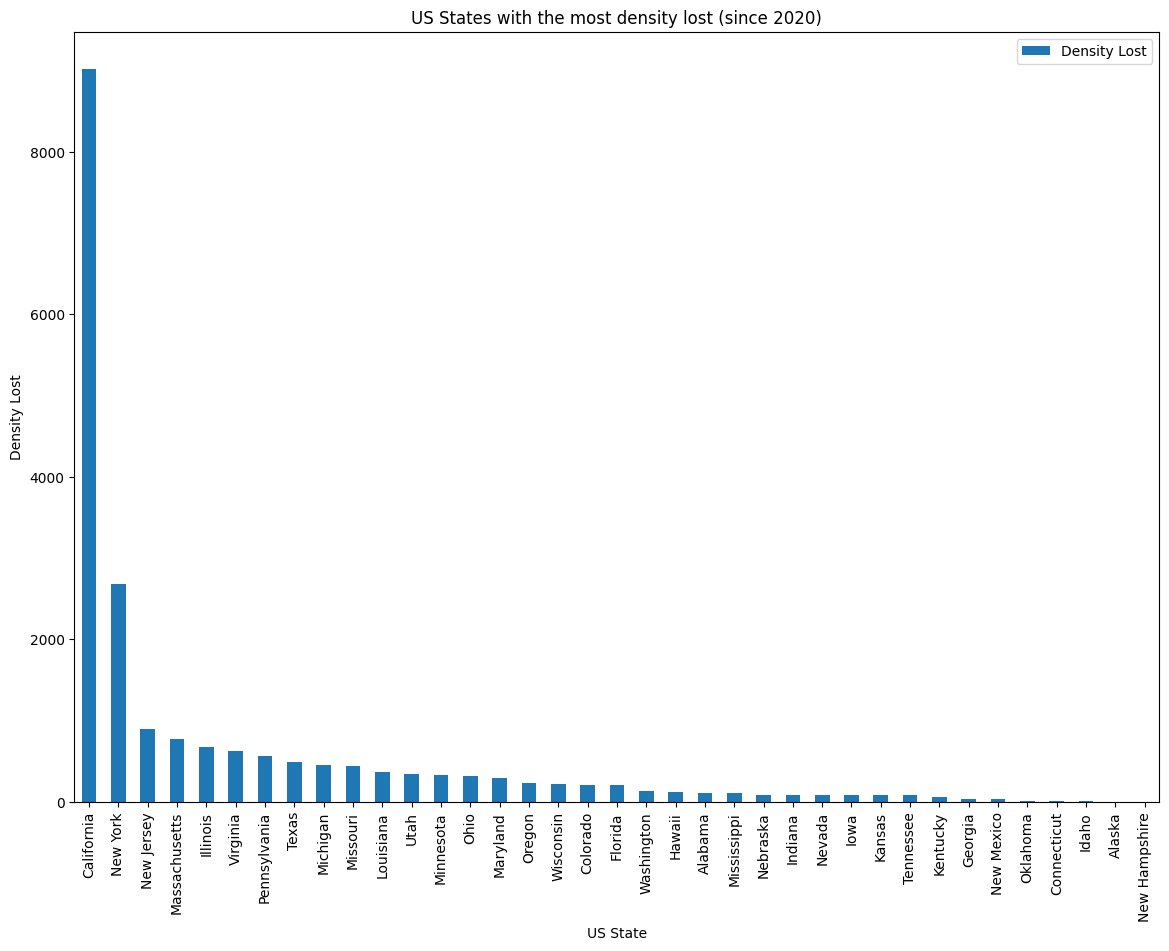

In [268]:
fig, ax = plt.subplots(figsize=(14, 10))
states_lose_density.plot(kind='bar', y='Density Lost', ylabel="Density Lost", ax=ax)
ax.set_title('US States with the most density lost (since 2020)')
plt.show()

In [270]:
data_filter = df_density['Diff Density (2024-2020)'] > 0
df_increased_density = df_density[data_filter]
df_increased_density.head()

Density 2020  Density 2024  Diff Density (2024-2020)
US State US City                                                         
Alabama  Huntsville           968          1022                        54
         Tuscaloosa          1677          1830                       153
Arizona  Buckeye              238           289                        51
         Chandler            4226          4283                        57
         Gilbert             3921          4041                       120

In [271]:
cities_increased_density = df_increased_density.reset_index(level=0).drop(columns='US State')
cities_increased_density = cities_increased_density.rename(columns={'Diff Density (2024-2020)': 'Density Increase'})
cities_increased_density.sort_values('Density Increase', ascending=False, inplace=True)
cities_increased_density.head()

,Density 2020,Density 2024,Density Increase
US City,,,
New Braunfels,2036,2607,571
Meridian,3241,3796,555
Nampa,2914,3410,496
Miami,12301,12787,486
Frisco,2957,3389,432


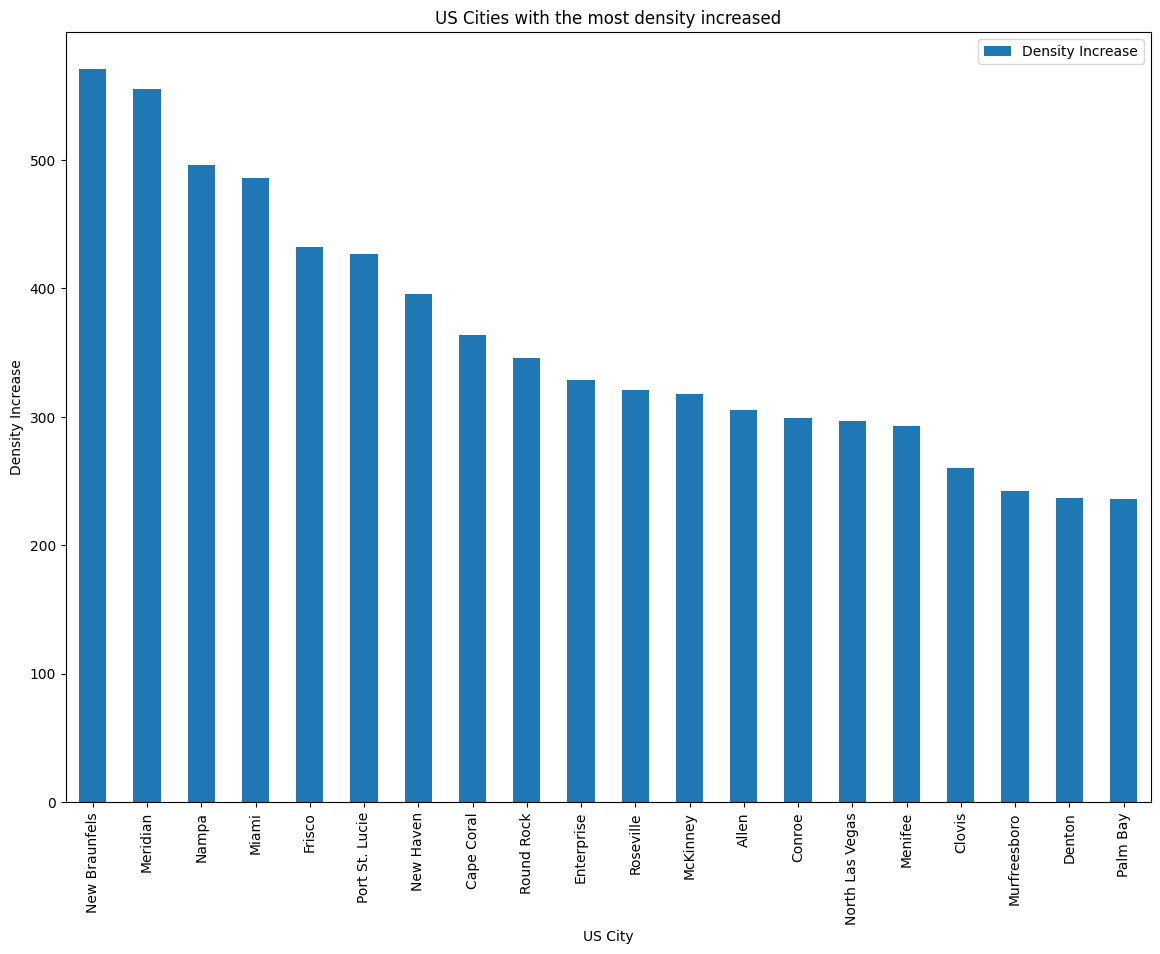

In [275]:
fig, ax = plt.subplots(figsize=(14,10))
cities_increased_density.head(20).plot(kind="bar", y="Density Increase", ylabel="Density Increase", ax=ax)
ax.set_title("US Cities with the most density increased")
plt.show()

In [280]:
states_increased_density = df_increased_density.reset_index(level=1).drop(columns='US City')
states_increased_density = states_increased_density.groupby(states_increased_density.index)[states_increased_density.columns].sum()

In [283]:
states_increased_density.sort_values('Diff Density (2024-2020)', ascending=False, inplace=True)
states_increased_density.head()

,Density 2020,Density 2024,Diff Density (2024-2020)
US State,,,
Texas,74798,79317,4519
Florida,70183,73157,2974
California,95450,97828,2378
Nevada,30397,31615,1218
Idaho,6155,7206,1051


In [295]:
df_increased_density.reset_index(level=1).groupby('US State')['Diff Density (2024-2020)'].sum().idxmax()

'Texas'

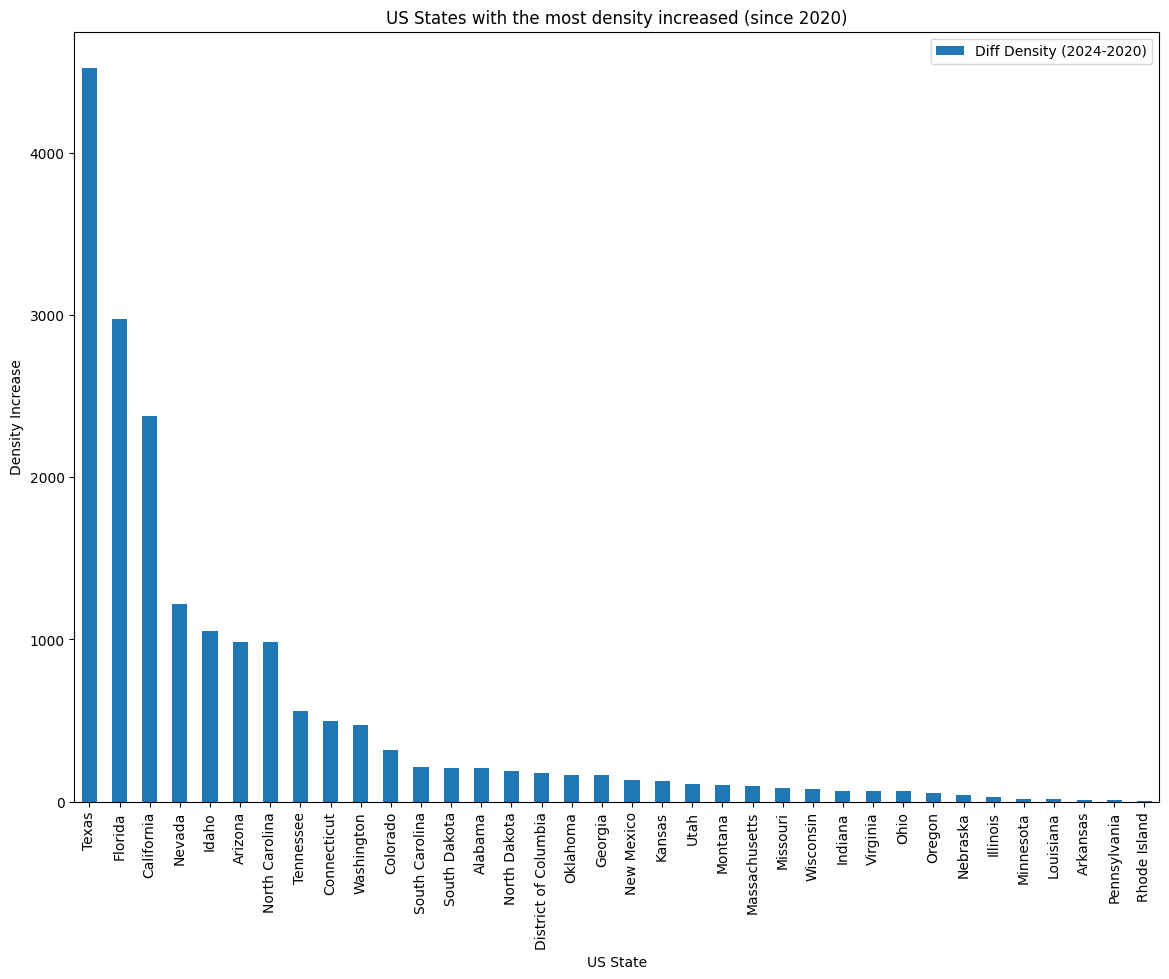

In [297]:
fig, ax = plt.subplots(figsize=(14, 10))
states_increased_density.plot(kind='bar', y='Diff Density (2024-2020)', ylabel='Density Increase',ax=ax)
ax.set_title('US States with the most density increased (since 2020)')
plt.show()